<a href="https://colab.research.google.com/github/Mr-Premanand/Netflix-Movies-And-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

First of all,Import the required libraries and modules 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import mixture
from sklearn.mixture import GaussianMixture
import matplotlib.cm as cm
import scipy.cluster.hierarchy as shc

import collections
from collections import Counter
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
nltk.download('punkt')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel

from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import pylab as pl
import spacy
import sklearn
import en_core_web_sm

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet
!pip install nltk
import nltk 
!python3 -c "import nltk; nltk.download('all')"

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.decomposition import TruncatedSVD

#stop-words
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import linear_kernel
from sklearn.preprocessing import StandardScaler


# Importing libraries for clustering
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from scipy.cluster.hierarchy import linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import OneHotEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# import and define the name to the dataset
netflix = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
netflix_df=netflix.copy()               # Create a copy of the original datasets
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## **Data Overview and Summary**

In [5]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [6]:
#get the information of the dataset
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [7]:
# get the statistics of the numerical feature
netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [8]:
# lets take the columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#check the null values in the dataset
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
# total number of null values
print('total number of null values in the dataset:',netflix_df.isnull().sum().sum())

total number of null values in the dataset: 3631


In [11]:
# check out the unique values in the datset
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [12]:
# from above it is seen that thire are two type, lets checkout
netflix_df.type.value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

From above data overview it is seen that : 
* In the given datasets, 7787 records and 12 features are available.
* A total of 3631 null values are present in 5 features (director, cast, country, date_added, rating).
* 'TV Show' and 'Movie' are the two shows that are available on Netflix.
* The oldest show in the dataset was released in 1925, and the most recent in 2021. 


# **Exploratory Data Analysis (EDA)**
---

## **Netflix Film Types**
Comparison between the total number of movies and shows in this dataset just to get an idea of which one is the majority

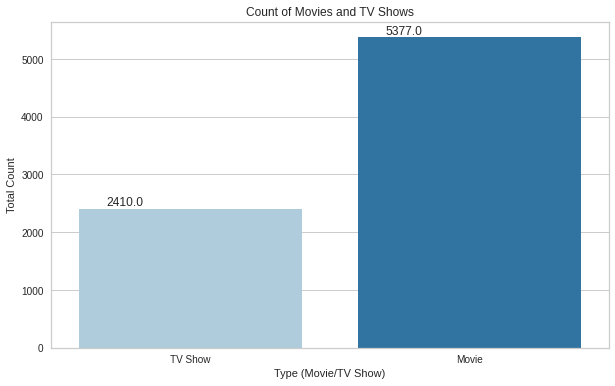

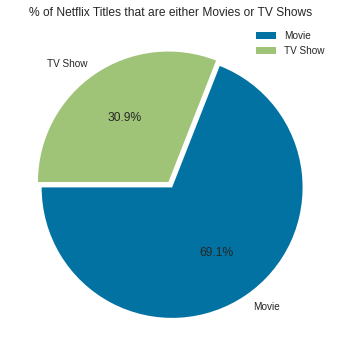

In [13]:
# plot the countplot to know the actual number of data in diffrent types
plt.figure(figsize=(10,6))
ax=sns.countplot(netflix_df.type, palette="Paired")
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))      # to print the values on the bar
plt.title("Count of Movies and TV Shows")
plt.xlabel("Type (Movie/TV Show)")
plt.ylabel("Total Count")
plt.show()

print('\n')

# plot the pie chart to gt the pecentagewise shows
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

So there are roughly 5377 movies and almost 2410 shows, with movies being the majority. This makes sense since shows are always an ongoing thing and have episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would come out on top. However, in terms of titles, there are far more movie titles (69.1 %) than TV show titles (30.9 %).

## **Netflix Film Ratings**
Now, we will explore the ratings which are based on the film rating system

In [14]:
#Create the two set for the two type of films
netflix_movies_df = netflix_df[netflix_df['type']=='Movie'].copy()       # for movies

netflix_tvshows_df = netflix_df[netflix_df['type']=='TV Show'].copy()       # for TV Shows

Set the order of rating by agewise from young to adults.

In [15]:
# order of rating
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']

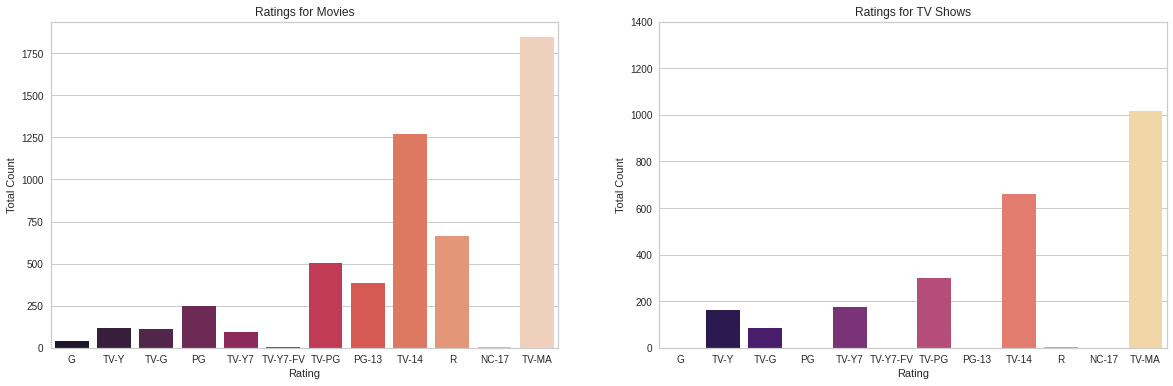

In [16]:
# plot of rating for two diffrent film type

fig, ax = plt.subplots(1,2, figsize=(20, 6)) 
# movies rating
g1 = sns.countplot(netflix_movies_df.rating, order=order,palette="rocket", ax=ax[0]);
g1.set_title("Ratings for Movies")
g1.set_xlabel("Rating")
g1.set_ylabel("Total Count")

# tvshow rating
g2 = sns.countplot(netflix_tvshows_df.rating, order=order,palette="magma", ax=ax[1]);
g2.set(yticks=np.arange(0,1600,200))
g2.set_title("Ratings for TV Shows")
g2.set_xlabel("Rating")
g2.set_ylabel("Total Count")
fig.show()

As seen in the above plots, there is much more content for a more mature audience(MA). For the mature audience, there is much more movie content than the TV shows. Also, for the younger audience (under the age of 17), it is the similar, there are more movies than TV shows.

## **Netflix Films Country**
Now we will check the density of the films releases in diffrent country.

In [17]:
# get the dataframe for the countrywise films distribution for top 10 countries
countries = netflix_df.country.value_counts().nlargest(10).reset_index()
countries.rename(columns={ 'index':'country_name','country':'films_counts'},inplace=True)

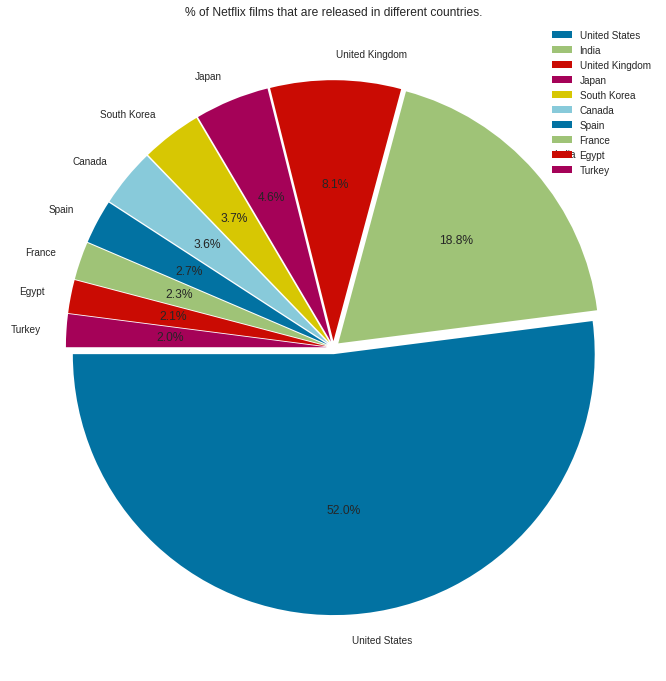

In [18]:
# Now plot the above data
plt.figure(figsize=(12,12))
plt.title("% of Netflix films that are released in different countries.")
plt.pie(countries.films_counts, explode=(0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025,0.025), labels=countries.country_name,autopct='%1.1f%%', startangle=180)
plt.legend()
plt.show()

Overall, there is much more content that comes from the United States (52 %) and India (18 %). In the US, Hollywood spends a lot of money on its movies. The US has historically been the largest market for films, so American studios have amassed a lot of wealth and resources. That's why most of the movies come from the US.

## **Content added on Netflix each year**
Now we will take a look at the amount content Netflix has added throughout the previous years.

### **Yearwise**
We will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [19]:
# add new features
netflix_movies_df['year_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).year
netflix_tvshows_df['year_added'] = pd.DatetimeIndex(netflix_tvshows_df['date_added']).year

I decided to exclude content added during 2021 since the data does not include a full years worth of data.

In [20]:
# take the count of film release and rename the columns name
movies_year=netflix_movies_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movies_year = movies_year[movies_year.year < 2021]
tvshows_year=netflix_tvshows_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
tvshows_year = tvshows_year[tvshows_year.year < 2021]

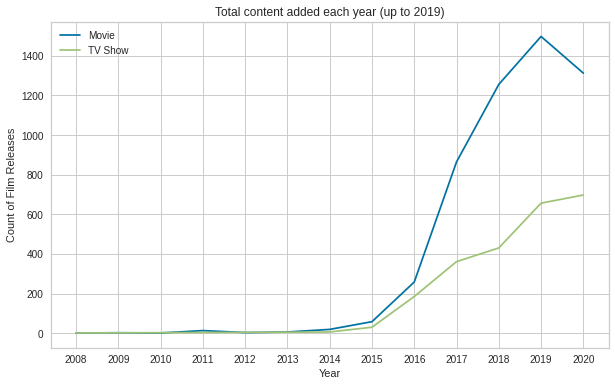

In [21]:
#Plot the lineplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_year, x='year', y='count')
sns.lineplot(data=tvshows_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2021, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count of Film Releases")
plt.xlabel("Year")
plt.show()

From above plot we can see that there has been a consistent growth in the number of movies on Netflix compared to tv shows. Based on the above timeline, Netflix started gaining traction after 2014. Since then, the amount of content added has been tremendous.   

### **Monthwise**
Now, take the plot for the monthwise distribution of the releases of the films.

We will add a 'month_added' column shows the year of the date from the 'date_added' column as shown above.

In [22]:
# add new features
netflix_movies_df['month_added'] = pd.DatetimeIndex(netflix_movies_df['date_added']).month
netflix_tvshows_df['month_added'] = pd.DatetimeIndex(netflix_tvshows_df['date_added']).month

In [23]:
# take the count of film release and rename the columns name
movies_month=netflix_movies_df.month_added.value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'count'})
movies_month = movies_month[movies_month.month < 2021]
tvshows_month=netflix_tvshows_df.month_added.value_counts().to_frame().reset_index().rename(columns={'index': 'month','month_added':'count'})
tvshows_month = tvshows_month[tvshows_month.month < 2021]

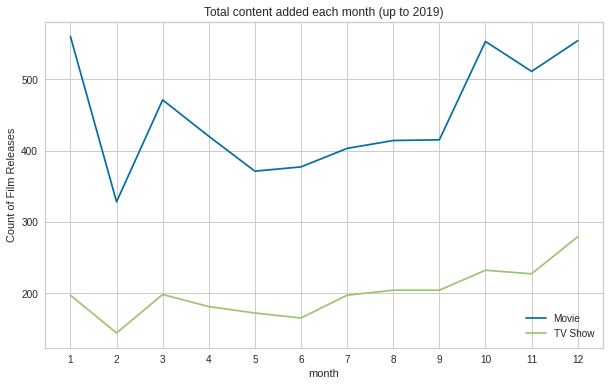

In [24]:
#Plot the lineplot
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=movies_month, x='month', y='count')
sns.lineplot(data=tvshows_month, x='month', y='count')
ax.set_xticks(np.arange(1,13, 1))
plt.title("Total content added each month (up to 2019)")
plt.legend(['Movie','TV Show'])
plt.ylabel("Count of Film Releases")
plt.xlabel("month")
plt.show()

By observing above plot it is seen that most of movies are release in holidays month i.e. january, octomber, november, december.

## **Popular Geners**
 Now we will check the type of movie or tv shows audiance prefer.

In [25]:
# get the value  count of the geners
filtered_genres = netflix_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_genres

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zulu Man in Japan                                Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 17071, dtype: object

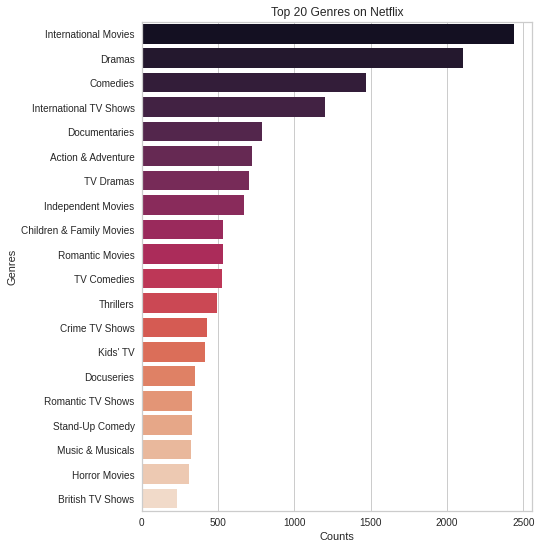

In [26]:
#Plot the to 20 geners
plt.figure(figsize=(7,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20],palette='rocket')
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Counts')
plt.ylabel('Genres')
plt.show()

International movies take a peak and are followed by dramas and comedies. As we can see from the above pie chart, the United States has the most content available. It looks like Netflix has decided to release a tonne of international movies. The reason for this could be that most Netflix subscribers aren't actually in the United States, but rather the majority of viewers are international subscribers.

## **Netflix Film Duration**
In this we will observe the distribution of the duration of the movies on normal plot and distribution of the seasons for TV shows on barplot.

Movies are based on the duration of the movie and shows are based on the number of seasons. 

In [27]:
# convert the values in these columns into integers for both the movies and shows datasets.
netflix_movies_df.duration = netflix_movies_df.duration.str.replace(' min','').astype(int)        # remove the 'min' unit and convert into integer format for movies duration

netflix_tvshows_df.rename(columns={'duration':'seasons'}, inplace=True)                            # change the name for the tv shows as there are seasons instead of duration
netflix_tvshows_df.replace({'seasons':{'1 Season':'1 Seasons'}}, inplace=True)                       # replace the 'seasons' notation
netflix_tvshows_df.seasons = netflix_tvshows_df.seasons.str.replace(' Seasons','').astype(int)           # remove the 'seasons' notation and convert into integer for computation 

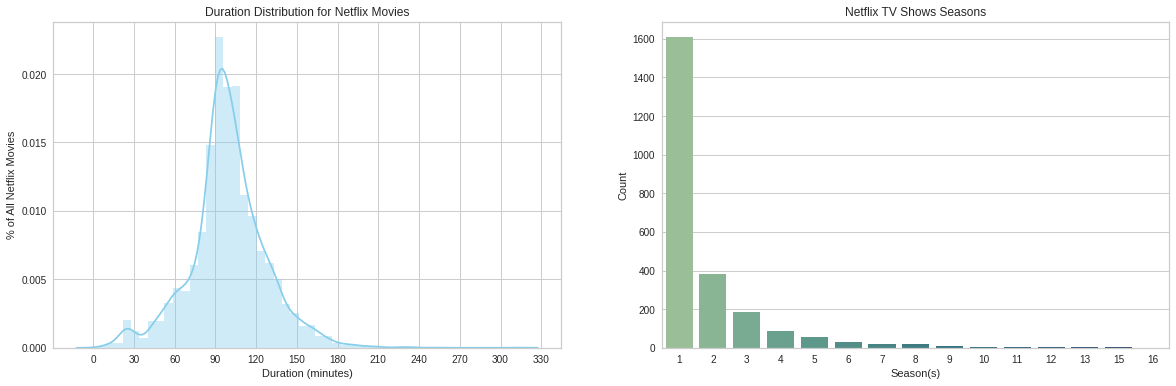

In [28]:
# plot the duration and season distribution
fig, ax = plt.subplots(1,2, figsize=(20, 6))
g1 = sns.distplot(netflix_movies_df.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(netflix_tvshows_df.seasons,ax=ax[1], palette='crest');
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

We know that movies are measured in time and shows are measured by seasons, so we have split the duration feature into two parts. Above, on the left side, we can see that most of the movies are about 90 minutes long, which seems to make sense. On the right hand side, distribution is skewwed toward the right because most TV shows have one season.

## **Top 10 Director on the Netflix**

In [29]:
# split the directors name and take them one by one
netflix_directtor = netflix_df.director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
netflix_directtor.value_counts()

Jan Suter              21
Raúl Campos            19
Marcus Raboy           16
Jay Karas              15
Cathy Garcia-Molina    13
                       ..
Sajid Khan              1
Lucy van Beek           1
Remi Weekes             1
Jennifer Lynch          1
Mozez Singh             1
Length: 4478, dtype: int64

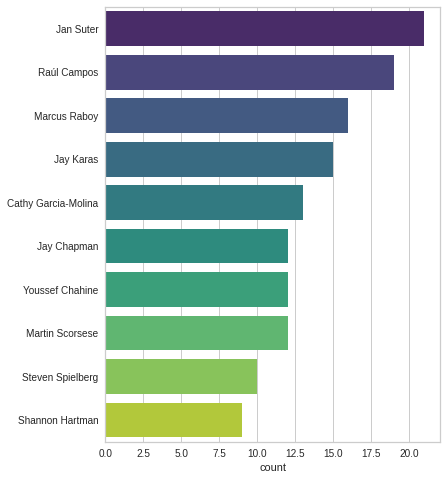

In [30]:
#plot the above top 10 director list
plt.figure(figsize=(6,8))
sns.countplot(y = netflix_directtor, order=netflix_directtor.value_counts().index[:10], palette='viridis')
plt.show()

As above 'Jan Suter' directed the most of the movies, as stated previously regarding the top genres, it's no surprise that the most popular directors on Netflix with the most titles are mainly international as well.

## **Top 10 actors on Netflix**


In [31]:
# Split the cast and stack them one by one
netflix_cast = netflix_df.cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

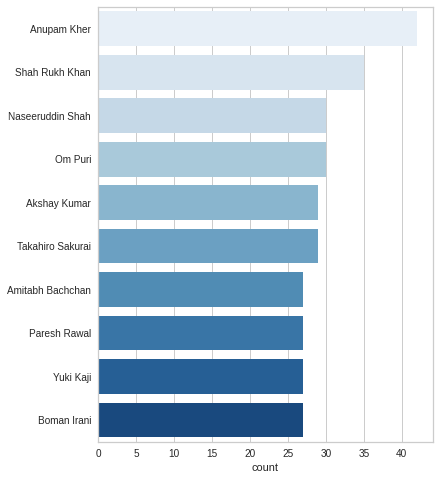

In [32]:
#plot the above top 10 actor list
plt.figure(figsize=(6,8))
sns.countplot(y = netflix_cast, order = netflix_cast.value_counts().index[:10], palette='Blues')
plt.show()

'Anupam Kher' casted in the most of the films. as above most popular actors on Netflix based on the number of titles are all international as well.

# **EDA Conclusion**
We can see from the data that the company took certain approaches in their marketing strategy to break into new markets around the world. As of June 30, 2022, Netflix had 220.7 million subscribers worldwide, including 73.3 million in the United States and almost 147 million internationally. A large part of its success was due to the decision to expand to international markets, and we can see that a good number of international movies and TV shows were added over the years as part of Netflix's global expansion.

# **Clustering the Movies and TV Shows**
---
We are going to cluster the films data based on the description and type i.e. genres of the film data and other given data (type, title, director, cast, country,  date_added, release_year, rating, duration) because most of the audience choose the film based on the description and type (genres) of the movie or either cast of the film or availability of the time. So we have grouped them into two parts to cluster the data for a better recommendation.

# **1. Description and Genre Based Clustering**



## **Similarity Based Clustering and Recommendation**
In the Text Similarity Problems, If we are applying cosine similarity then we have to convert texts into the respective vectors because we directly can’t use text for finding similarity. Let’s create vectors for given movie reviews using the TF-IDF approach

In [33]:
#vectorize the description 
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

tfidf_matrix = tfidf.fit_transform(netflix['description'])

Cosine similarity measures the cosine angle between two text vectors. Its value implies that how two documents are related to each other

In [34]:
# Compute the Cosine Similarity
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Create a pandas series with movie titles as indices and indices as series values 
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

indices

title
3%                                            0
7:19                                          1
23:59                                         2
9                                             3
21                                            4
                                           ... 
Zozo                                       7782
Zubaan                                     7783
Zulu Man in Japan                          7784
Zumbo's Just Desserts                      7785
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    7786
Length: 7787, dtype: int64

In [35]:
# function to clean the data
ef recom_movie(title, cos=similarity_matrix):
    idx = indices[title]                                                              # Get the index corresponding to movie title
    
    cos_scores = list(enumerate(cos[idx]))                                            # Get the cosine similarity scores
    
    cos_scores = sorted(cos_scores,key=lambda x: x[1],reverse = True)                 # Sort the similarity scores in descending order
    
    cos_scores = cos_scores[1:11]                                                     # Top-10 most similar movie scores

    movie_df_new = [i[0] for i in cos_scores]                                         # Get movie indices
    
    return (netflix['title'].iloc[movie_df_new]+ ' : ' + netflix['description'].iloc[movie_df_new]).to_frame().rename(columns={0:'movies with description'})      # Top 10 recommende movie with  description

In [36]:
print("\n Recommended Movie ")
recom_movie('Zubaan')


 Recommended Movie 


,movies with description
3294,"Kalel, 15 : Surrounded by tensions and secrets..."
1777,Disco Dancer : A poor boy grows up to be a fam...
4603,"Old Money : Backstabbing, blackmail and reveng..."
6441,The Haunting of Molly Hartley : A troubled tee...
1758,Dil Dhadakne Do : While hosting a shipboard ho...
3995,May the Devil Take You : Hoping to find answer...
152,A Boy Name Flora A : A 28-year-old layabout be...
3359,Khosla Ka Ghosla : A cranky control freak must...
3448,Krish Trish and Baltiboy: Face Your Fears : In...
6800,The Rainmaker : A young attorney and a scrappy...


## **Data Cleaning and Pre-processing**

In [37]:
# create the copy of original dataset
flix_copy =netflix.copy()

In [38]:
#combining genre and description column 
combined_df = flix_copy['listed_in'] + flix_copy['description']
combined_df

0       International TV Shows, TV Dramas, TV Sci-Fi &...
1       Dramas, International MoviesAfter a devastatin...
2       Horror Movies, International MoviesWhen an arm...
3       Action & Adventure, Independent Movies, Sci-Fi...
4       DramasA brilliant group of students become car...
                              ...                        
7782    Dramas, International MoviesWhen Lebanon's Civ...
7783    Dramas, International Movies, Music & Musicals...
7784    Documentaries, International Movies, Music & M...
7785    International TV Shows, Reality TVDessert wiza...
7786    Documentaries, Music & MusicalsThis documentar...
Length: 7787, dtype: object

In [39]:
#fuction for cleaning text
def clean_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text)
    tokens=[le.lemmatize(w) for w in word_tokens if w not in STOPWORDS and len(w)>3]
    cleaned_text=" ".join(tokens)
    return cleaned_text

In [40]:
# apply the function on combined dataframe to clean the text
cleaned_df = combined_df.apply(clean_text)
cleaned_df

0       International Shows Dramas Sci-Fi FantasyIn fu...
1       Dramas International MoviesAfter devastating e...
2       Horror Movies International MoviesWhen army re...
3       Action Adventure Independent Movies Sci-Fi Fan...
4       DramasA brilliant group student become card-co...
                              ...                        
7782    Dramas International MoviesWhen Lebanon Civil ...
7783    Dramas International Movies Music MusicalsA sc...
7784    Documentaries International Movies Music Music...
7785    International Shows Reality TVDessert wizard A...
7786    Documentaries Music MusicalsThis documentary d...
Length: 7787, dtype: object

In [41]:
# vectorize the above cleaned data
vect = TfidfVectorizer(stop_words=STOPWORDS,max_features=1000)
vect_text_matrix = vect.fit_transform(cleaned_df)

## **Frequency of the Words**
A frequency distribution tells us the frequency of each vocabulary item in the text. It tells us how the total number of word tokens in the text are distributed across the vocabulary items.

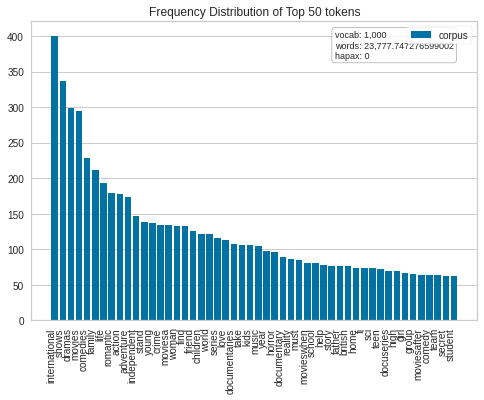

In [67]:
from yellowbrick.text import FreqDistVisualizer
#get the important words
features   = vect.get_feature_names()                                            # words

visualizer = FreqDistVisualizer(features=features, orient='v')                   # define the distribution visualizer
visualizer.fit(vect_text_matrix)                                                 # fit the vectorised data
visualizer.show()

## **Clustering Models**

## **Gaussian Mixture Model (GMMs)**
Let's see if GMMs can help us recover the number of topics using the AIC score to guide us

In [42]:
from scipy.sparse.linalg import svds
from sklearn.mixture import GaussianMixture
# define the function to get the best AIC score on diffrent number of cluster/topic
def get_gmm_labels(vect_text_matrix, k):
    gmm = GaussianMixture(n_components=k, max_iter=200, random_state=37)           # define gaussian mixture model and basic parameter
    gmm.fit(vect_text_matrix)                                                      # fit the vectorised data in model to cluster
    
    aic = gmm.aic(vect_text_matrix)                                                # AIC score
    print('{}: aic={}'.format(k, aic))
    return k, aic

U, S, V = svds(vect_text_matrix, k=20)
gmm_scores = [get_gmm_labels(U, k) for k in range(2, 26)]

2: aic=-1036301.3923076397
3: aic=-1069300.3994511983
4: aic=-1079495.8770556678
5: aic=-1101711.001019775
6: aic=-1116319.0736291427
7: aic=-1131239.7339702698
8: aic=-1140305.7996990285
9: aic=-1146651.487021904
10: aic=-1154605.632660172
11: aic=-1161452.2759904522
12: aic=-1169221.873324423
13: aic=-1169685.92425801
14: aic=-1173898.5460872592
15: aic=-1176102.88383199
16: aic=-1176920.645554811
17: aic=-1183986.238965449
18: aic=-1187256.8979295497
19: aic=-1190076.5603630275
20: aic=-1191798.0540861166
21: aic=-1190482.20665507
22: aic=-1193581.0271749792
23: aic=-1194796.0523627482
24: aic=-1197448.9331215862
25: aic=-1198116.0901125171


## **K-Means Clustering Model (KMC)**
Let's see if KMC can help us to recover the number of topics using the Silhouette score to guide us.

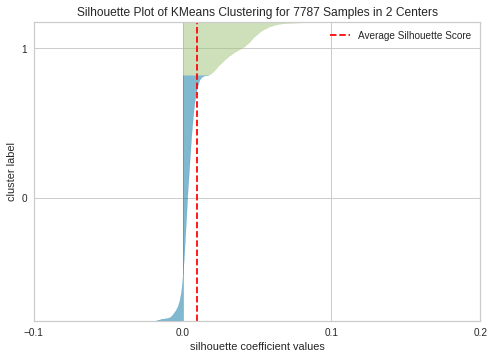

2: score=0.009410332961138116


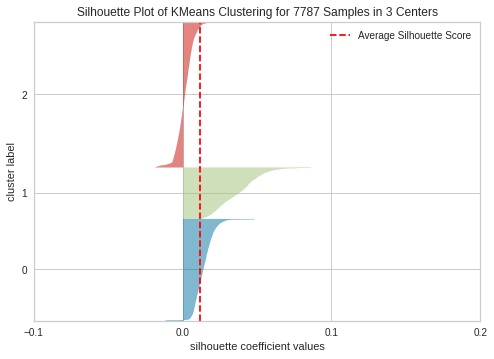

3: score=0.011648149198690377


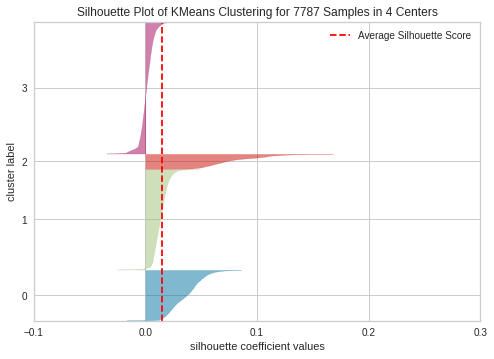

4: score=0.014975961064695838


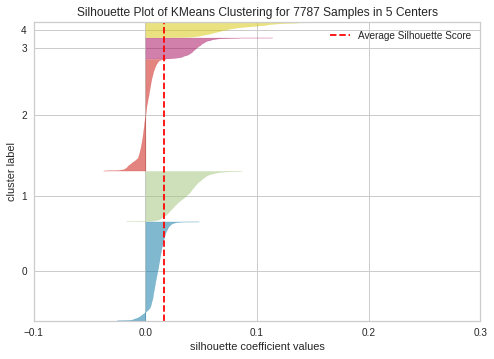

5: score=0.016374750739189262


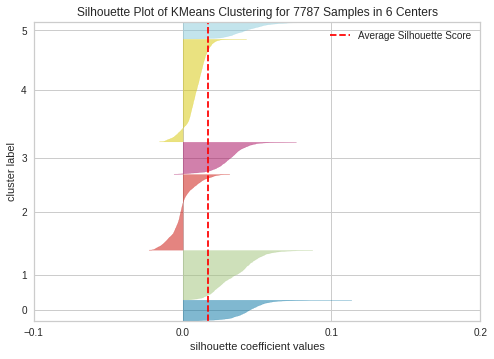

6: score=0.01734907964808423


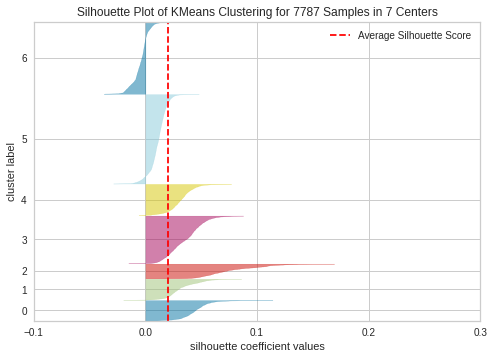

7: score=0.020325899319780356


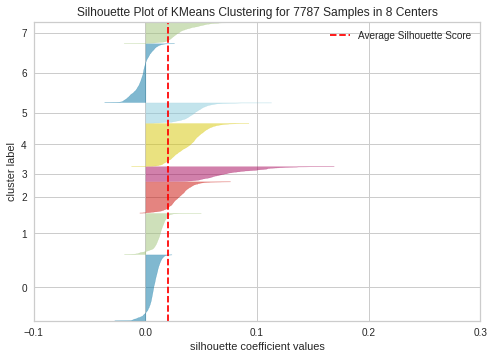

8: score=0.02022459365972846


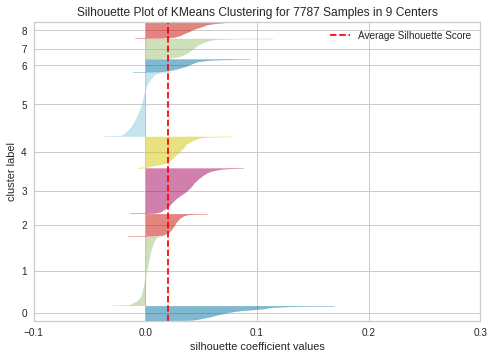

9: score=0.020465331565588336


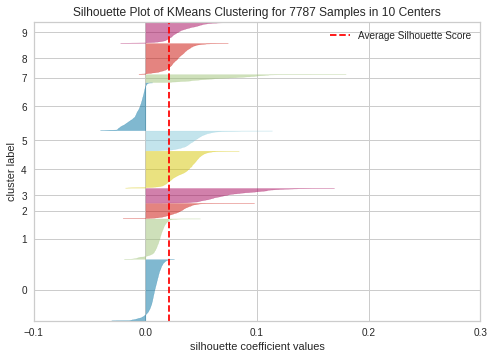

10: score=0.0214442331177291


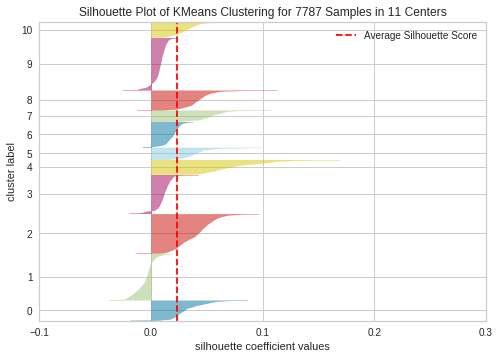

11: score=0.022897454983418074


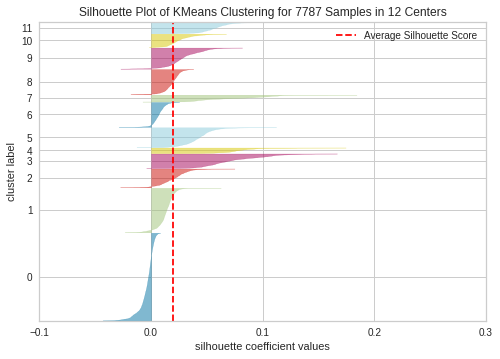

12: score=0.01940115558654399


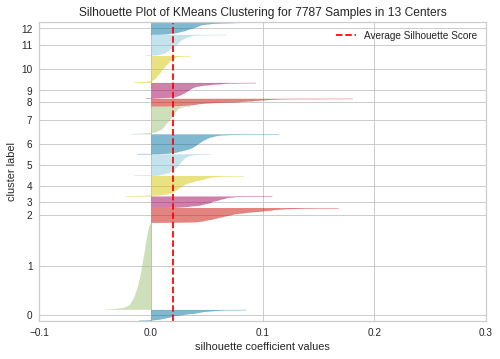

13: score=0.019411269903597844


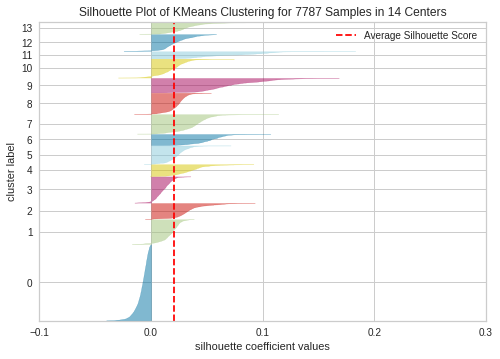

14: score=0.02052181704998654


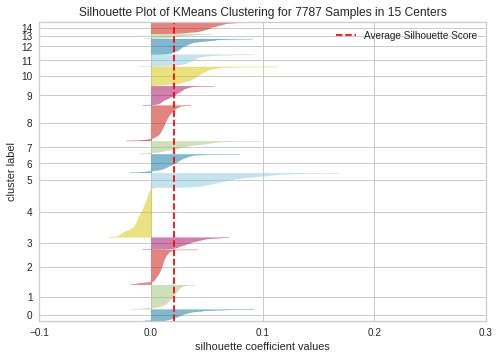

15: score=0.0203787611255439


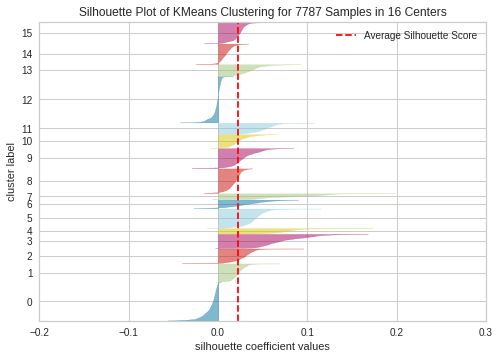

16: score=0.022358140120886848


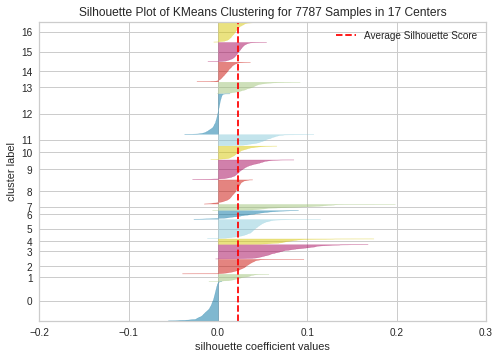

17: score=0.02217355990794266


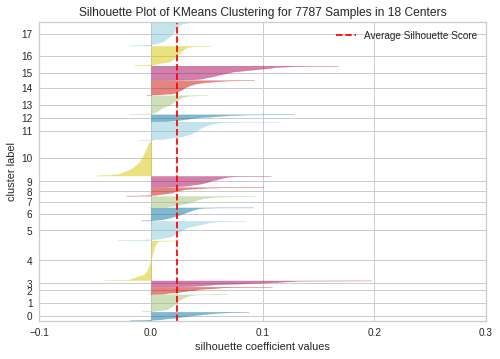

18: score=0.022884364023415288


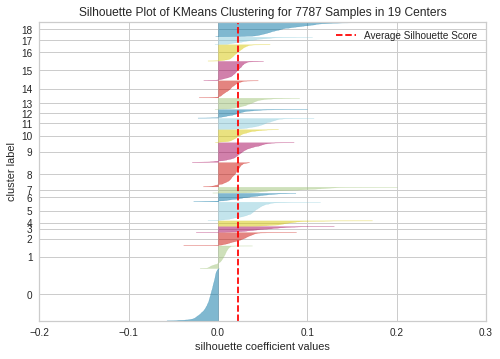

19: score=0.022731235267017834


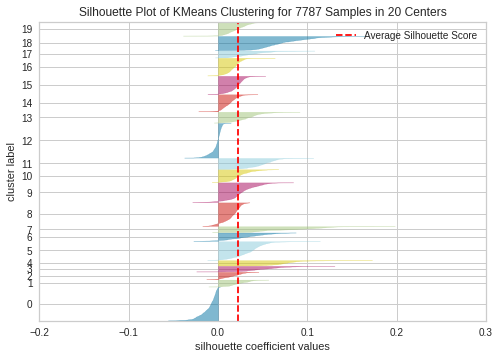

20: score=0.0226740226164849


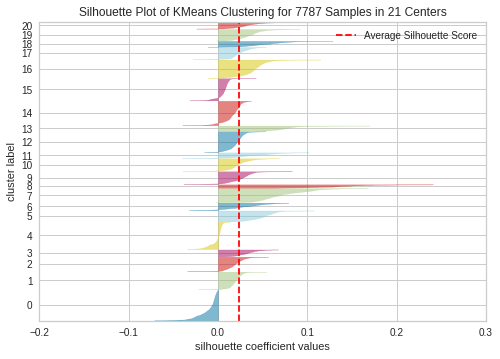

21: score=0.023679507175222433


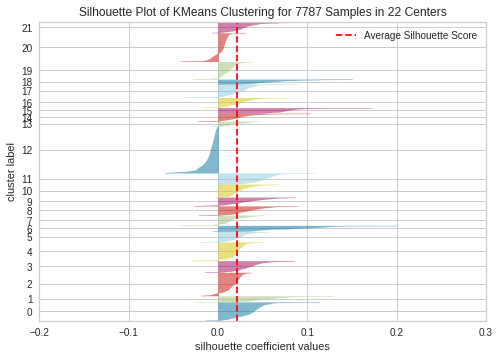

22: score=0.020741760291965124


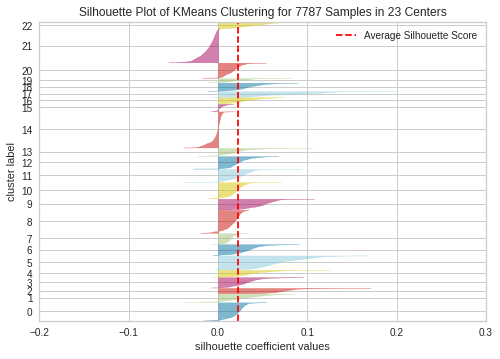

23: score=0.02194910996103873


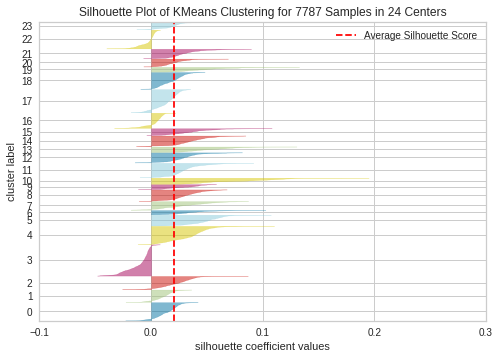

24: score=0.02092572052417795


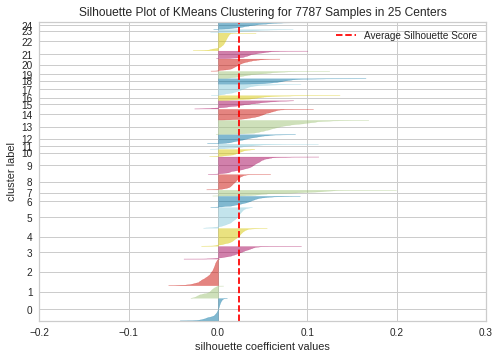

25: score=0.02378803253472659


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
# define the function to get the best AIC score on diffrent number of cluster/topic
def get_kmc(vect_text_matrix, k):
    model = KMeans(k, random_state=37)                                            # define Kmean model and basic parameter
    model.fit(vect_text_matrix)                                                   # fit the vectorized data in model to cluster
    labels = model.predict(vect_text_matrix) 

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')                # define silhouette score visualized
    visualizer.fit(vect_text_matrix)                                              # Fit the data to the visualizer
    visualizer.show()

    score = silhouette_score(vect_text_matrix, labels)                            # get the selhoutte score
    print('{}: score={}'.format(k, score))
    return k, score

kmc_scores = [get_kmc(vect_text_matrix, k) for k in range(2, 26)]

### **Elbow Method**
Visualize the clusters according to some scoring function, look for an “elbow” in the curve.

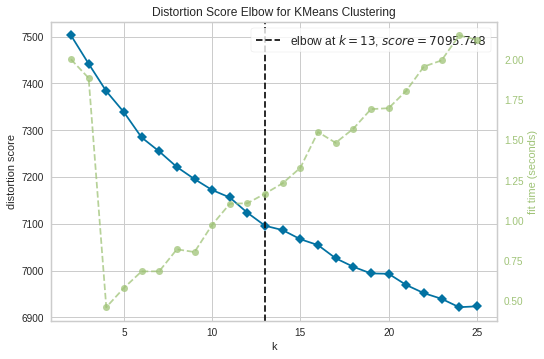

In [49]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,26))                                   # elbow visualizer 

visualizer.fit(vect_text_matrix)                                                 # Fit the data to the visualizer
visualizer.show()                                                                # Finalize and render the figure

## **Latent Dirichlet Allocation Model (LDA)**
Here, we will use LDA topic modeling technique and the coherence score to guide us recovering the number of topics.

In [50]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel
# define the function to get the best AIC score on diffrent number of cluster/topic
def learn_lda_model(corpus, dictionary, k):
    lda = LdaModel(corpus,                                                         # deine the lda model and parameter
               id2word=dictionary, 
               num_topics=k, 
               random_state=37, 
               iterations=100,
               passes=5,
               per_word_topics=False)
    
    cm = CoherenceModel(model=lda, corpus=corpus, coherence='u_mass')             # get the CM score
    coherence = cm.get_coherence()
    print('{}: {}'.format(k, coherence))
    return k, coherence

T = [t.split(' ') for t in cleaned_df]

dictionary = corpora.Dictionary(T)
corpus = [dictionary.doc2bow(text) for text in T]

lda_scores = [learn_lda_model(corpus, dictionary, k) for k in range(2, 26)]

2: -5.249277344237186
3: -5.113459373452465
4: -4.91157910572768
5: -4.77312112702357
6: -4.775077517492026
7: -5.069165862601151
8: -4.865520624660383
9: -4.999545441771314
10: -4.4676342872988775
11: -4.8226434612959075
12: -5.223008195580647
13: -6.133118351271799
14: -5.41896813830525
15: -4.476288425230109
16: -5.635830605882173
17: -5.156223087024408
18: -5.522252169443764
19: -5.4920077706361194
20: -6.273697299862958
21: -6.642640934616938
22: -6.542432011568951
23: -7.205847738501821
24: -7.645069728461764
25: -7.852021609312748


### We can also analyze the model by using LDA visualizer

In [51]:
# Install the LDA Visualizer
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5c6b0826c731b8b9c437b08a27a24a68f6145d583a9df8f6bce8814d1a49d1f0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2868ce6b26a476cd52ad3caf0e0dbc28f8f847412c2dd7342590383430952066
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [63]:
pyLDAvis.enable_notebook()
import pyLDAvis.gensim_models
import warnings
warnings.filterwarnings('ignore')

lda = LdaModel(corpus,                                                             # define the lda model to visualize the results of clustering
               id2word=dictionary, 
               num_topics=10, 
               random_state=37, 
               iterations=100,
               passes=5,
               per_word_topics=False)

lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

## **Now, visualize the above scores versus the number of cluster.**
In this we will visualize the scores (Gaussian mixture models (GMMs)-AIC, K-Mean Clustering-Silhouette and Latent Dirichlet Allocation-Coherence) versus the number of cluster (k).

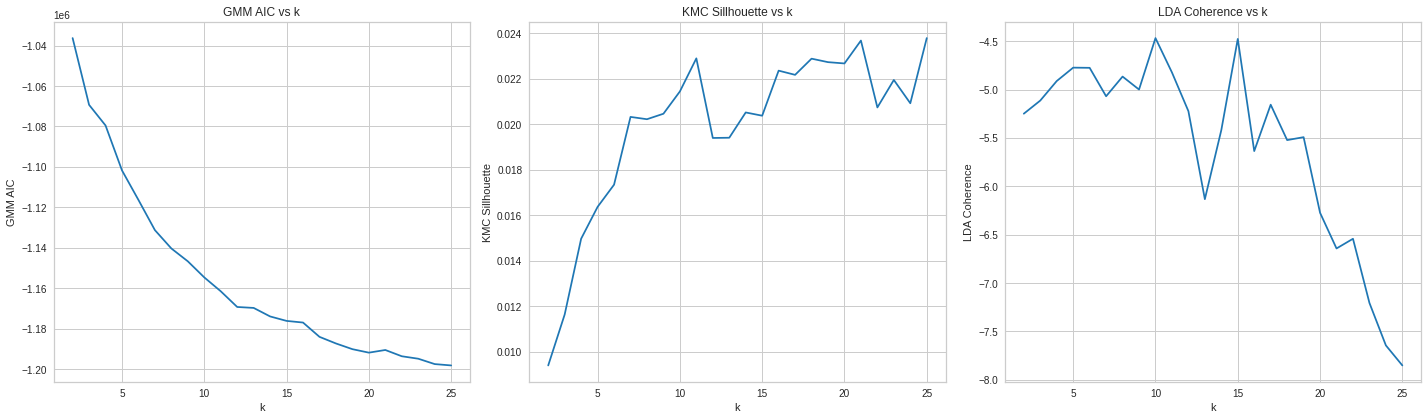

In [65]:

def plot_scores(scores, ax, ylabel):
    _x = [s[0] for s in scores]
    _y = [s[1] for s in scores]

    ax.plot(_x, _y, color='tab:blue')
    ax.set_xlabel('k')
    ax.set_ylabel(ylabel)
    ax.set_title('{} vs k'.format(ylabel))
    
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
plot_scores(gmm_scores, ax[0], 'GMM AIC')
plot_scores(kmc_scores, ax[1], 'KMC Sillhouette')
plot_scores(lda_scores, ax[2], 'LDA Coherence')

plt.tight_layout()

Significance of the score
* For AIC, the lower the score, the better 
* For silhouette, the higher the better 
* For coherence, the higher the better.

It seems that K-mean cluster's silhouette score does not really agree with AIC or coherence; and AIC and coherence (although negative correlated) seem to hint at the same number of topics.